<a href="https://colab.research.google.com/github/Go-Spect/Gaia-spots/blob/main/ROBO43_OCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ Gráfico salvo como: aglomerados_scatter_completo.png


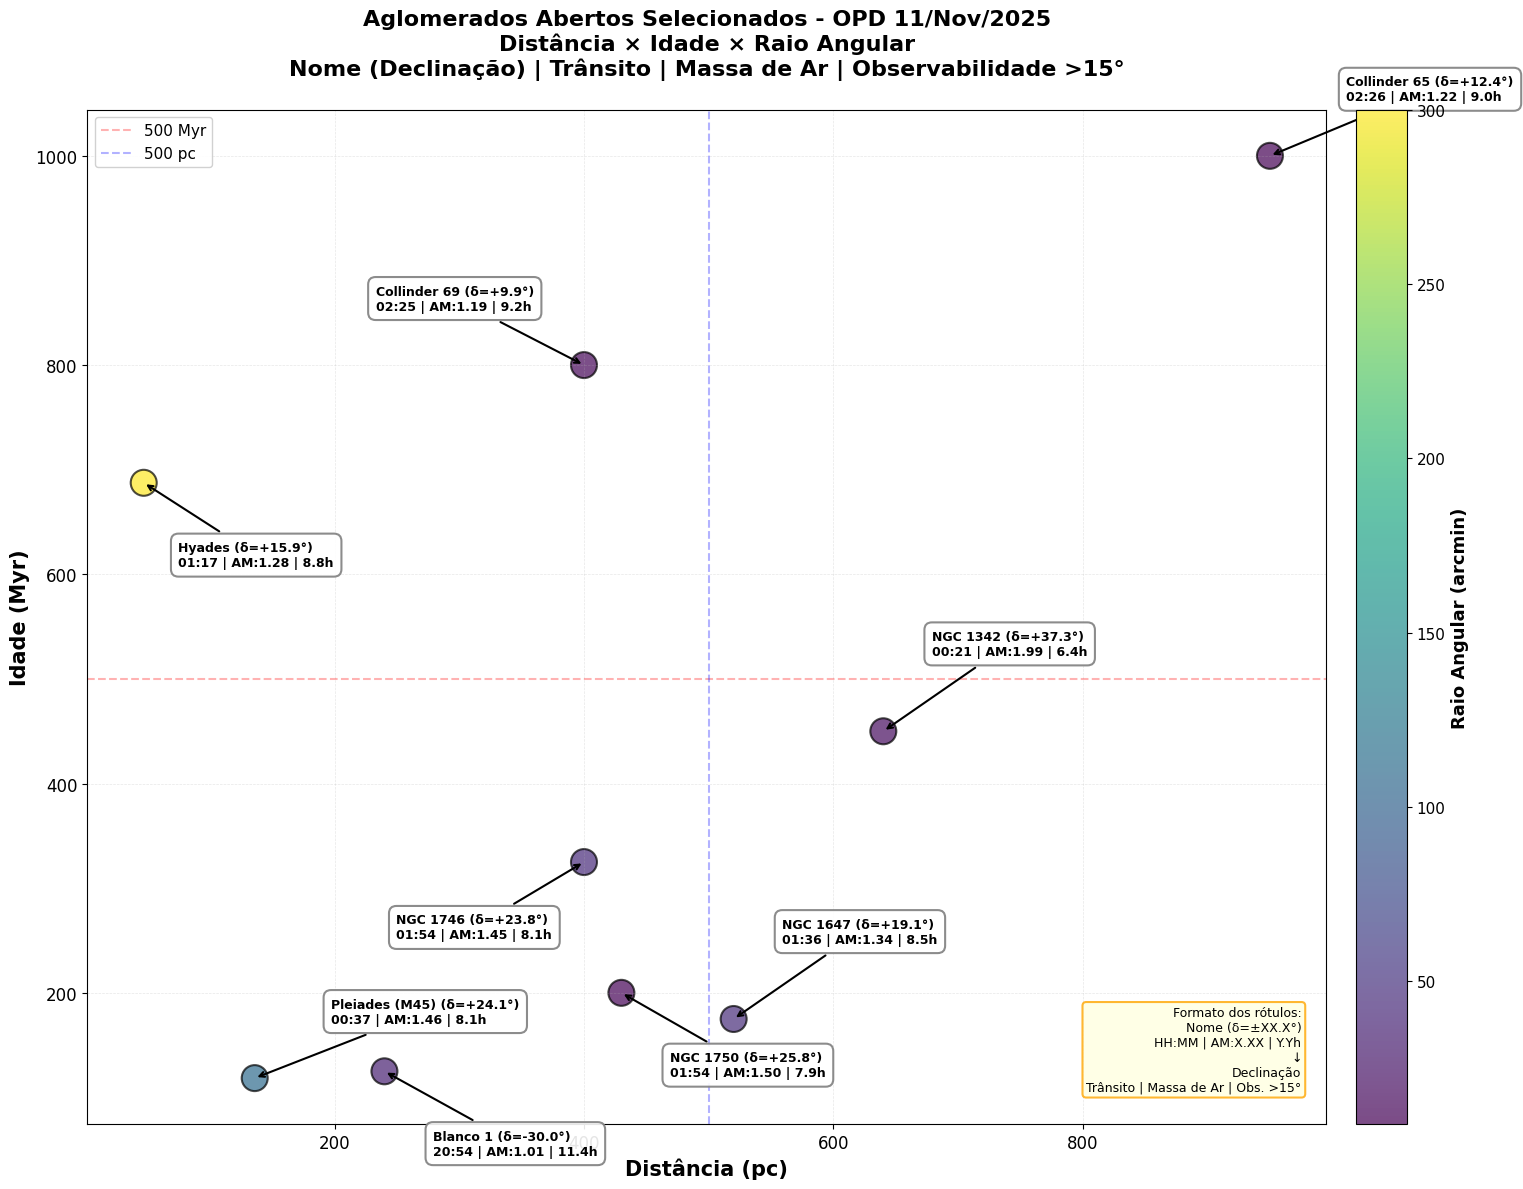


RESUMO COMPLETO DOS DADOS:
Nome               Dec(°)     Trânsito   Alt Max    AM       Obs>15°   
----------------------------------------------------------------------------------------------------
Hyades              +15.87  01:17         51.6°    1.28     8.8h
Pleiades (M45)      +24.11  00:37         43.4°    1.46     8.1h
Blanco 1            -29.97  20:54         82.6°    1.01    11.4h
Collinder 69         +9.93  02:25         57.5°    1.19     9.2h
NGC 1746            +23.78  01:54         43.7°    1.45     8.1h
NGC 1750            +25.75  01:54         41.7°    1.50     7.9h
NGC 1647            +19.07  01:36         48.4°    1.34     8.5h
NGC 1342            +37.32  00:21         30.1°    1.99     6.4h
Collinder 65        +12.43  02:26         55.0°    1.22     9.0h


In [ ]:
#!/usr/bin/env python3
"""
Script para plotar aglomerados abertos selecionados
Informações: Distância, Idade, Raio Angular, Declinação, Horário de trânsito,
            Massa de ar, Tempo de observabilidade

Observatório: Pico dos Dias (OPD)
Data: 11 de novembro de 2025
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# OPD coordinates
opd_lat = -22.5367  # degrees (South)
opd_lon = -45.5825  # degrees (West)

def calculate_altitude(dec_deg, lat_deg, ha_deg):
    """Calculate altitude above horizon"""
    dec_rad = np.radians(dec_deg)
    lat_rad = np.radians(lat_deg)
    ha_rad = np.radians(ha_deg)

    sin_alt = np.sin(dec_rad) * np.sin(lat_rad) + np.cos(dec_rad) * np.cos(lat_rad) * np.cos(ha_rad)
    alt_deg = np.degrees(np.arcsin(np.clip(sin_alt, -1, 1)))
    return alt_deg

def calculate_airmass(altitude_deg):
    """Calculate airmass from altitude using Hardie formula"""
    if altitude_deg <= 0:
        return 99.9
    z = 90 - altitude_deg  # zenith angle
    z_rad = np.radians(z)

    if z < 75:
        airmass = 1.0 / np.cos(z_rad)
    else:
        airmass = 1.0 / (np.cos(z_rad) + 0.025 * np.exp(-11 * np.cos(z_rad)))

    return airmass

# Dados dos aglomerados com coordenadas
clusters_data = [
    {'Nome': 'Hyades', 'ra_deg': 66.725, 'dec_deg': 15.87, 'Distancia_pc': 47,
     'Idade_Myr': 687.5, 'Raio_angular_arcmin': 300},
    {'Nome': 'Pleiades (M45)', 'ra_deg': 56.85, 'dec_deg': 24.11, 'Distancia_pc': 136,
     'Idade_Myr': 118.5, 'Raio_angular_arcmin': 110},
    {'Nome': 'Blanco 1', 'ra_deg': 1.075, 'dec_deg': -29.97, 'Distancia_pc': 240,
     'Idade_Myr': 125, 'Raio_angular_arcmin': 35},
    {'Nome': 'Collinder 69', 'ra_deg': 83.775, 'dec_deg': 9.93, 'Distancia_pc': 400,
     'Idade_Myr': 800, 'Raio_angular_arcmin': 12},
    {'Nome': 'NGC 1746', 'ra_deg': 75.9, 'dec_deg': 23.78, 'Distancia_pc': 400,
     'Idade_Myr': 325, 'Raio_angular_arcmin': 42},
    {'Nome': 'NGC 1750', 'ra_deg': 75.95, 'dec_deg': 25.75, 'Distancia_pc': 430,
     'Idade_Myr': 200, 'Raio_angular_arcmin': 11},
    {'Nome': 'NGC 1647', 'ra_deg': 71.45, 'dec_deg': 19.07, 'Distancia_pc': 520,
     'Idade_Myr': 175, 'Raio_angular_arcmin': 45},
    {'Nome': 'NGC 1342', 'ra_deg': 52.9, 'dec_deg': 37.32, 'Distancia_pc': 640,
     'Idade_Myr': 450, 'Raio_angular_arcmin': 18},
    {'Nome': 'Collinder 65', 'ra_deg': 83.95, 'dec_deg': 12.43, 'Distancia_pc': 950,
     'Idade_Myr': 1000, 'Raio_angular_arcmin': 9}
]

# Calcular observabilidade para cada aglomerado
for cluster in clusters_data:
    ra_deg = cluster['ra_deg']
    dec_deg = cluster['dec_deg']

    # Horário de trânsito (LST = RA)
    lst_at_transit = ra_deg / 15.0
    ut_transit = lst_at_transit + 3.04 - 3.2
    if ut_transit < 0:
        ut_transit += 24
    local_transit = ut_transit - 3
    if local_transit < 0:
        local_transit += 24

    transit_hour = int(local_transit)
    transit_min = int((local_transit - transit_hour) * 60)
    cluster['transit_time'] = f"{transit_hour:02d}:{transit_min:02d}"

    # Altitude máxima (no trânsito)
    max_altitude = calculate_altitude(dec_deg, opd_lat, 0)
    cluster['max_altitude'] = max_altitude

    # Massa de ar no trânsito
    cluster['airmass'] = calculate_airmass(max_altitude)

    # Horas acima de 15 graus
    sin_15 = np.sin(np.radians(15))
    sin_dec = np.sin(np.radians(dec_deg))
    sin_lat = np.sin(np.radians(opd_lat))
    cos_dec = np.cos(np.radians(dec_deg))
    cos_lat = np.cos(np.radians(opd_lat))

    cos_ha_15 = (sin_15 - sin_dec * sin_lat) / (cos_dec * cos_lat)

    if cos_ha_15 > 1:
        cluster['hours_above_15'] = 0
    elif cos_ha_15 < -1:
        cluster['hours_above_15'] = 24
    else:
        ha_15 = np.degrees(np.arccos(cos_ha_15))
        cluster['hours_above_15'] = 2 * ha_15 / 15.0

df = pd.DataFrame(clusters_data)

# Criar o scatter plot
fig, ax = plt.subplots(figsize=(16, 12))

scatter = ax.scatter(df['Distancia_pc'],
                     df['Idade_Myr'],
                     c=df['Raio_angular_arcmin'],
                     s=350,
                     cmap='viridis',
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=1.5)

cbar = plt.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label('Raio Angular (arcmin)', fontsize=13, fontweight='bold')
cbar.ax.tick_params(labelsize=11)

# Adicionar rótulos com informações completas incluindo declinação
for idx, row in df.iterrows():
    name = row['Nome']
    transit = row['transit_time']
    airmass = row['airmass']
    obs_hours = row['hours_above_15']
    dec = row['dec_deg']

    label = f"{name} (δ={dec:+.1f}°)\n{transit} | AM:{airmass:.2f} | {obs_hours:.1f}h"

    offset_x = 25
    offset_y = 35

    if name == 'NGC 1746':
        offset_x, offset_y = -135, -55
    elif name == 'Collinder 69':
        offset_x, offset_y = -150, 40
    elif name == 'NGC 1750':
        offset_x, offset_y = 35, -60
    elif name == 'NGC 1342':
        offset_x, offset_y = 35, 55
    elif name == 'Hyades':
        offset_x, offset_y = 25, -60
    elif name == 'Pleiades (M45)':
        offset_x, offset_y = 55, 40
    elif name == 'Blanco 1':
        offset_x, offset_y = 35, -60
    elif name == 'NGC 1647':
        offset_x, offset_y = 35, 55
    elif name == 'Collinder 65':
        offset_x, offset_y = 55, 40

    ax.annotate(label,
                (row['Distancia_pc'], row['Idade_Myr']),
                xytext=(offset_x, offset_y),
                textcoords='offset points',
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
                         alpha=0.9, edgecolor='gray', linewidth=1.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0',
                               color='black', lw=1.5))

ax.set_xlabel('Distância (pc)', fontsize=15, fontweight='bold')
ax.set_ylabel('Idade (Myr)', fontsize=15, fontweight='bold')
ax.set_title('Aglomerados Abertos Selecionados - OPD 11/Nov/2025\n' +
             'Distância × Idade × Raio Angular\n' +
             'Nome (Declinação) | Trânsito | Massa de Ar | Observabilidade >15°',
             fontsize=16, fontweight='bold', pad=25)

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', labelsize=12)

ax.axhline(y=500, color='red', linestyle='--', alpha=0.3, linewidth=1.5, label='500 Myr')
ax.axvline(x=500, color='blue', linestyle='--', alpha=0.3, linewidth=1.5, label='500 pc')
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)

info_text = ("Formato dos rótulos:\n"
             "Nome (δ=±XX.X°)\n"
             "HH:MM | AM:X.XX | Y.Yh\n"
             "↓\n"
             "Declinação\n"
             "Trânsito | Massa de Ar | Obs. >15°")
ax.text(0.98, 0.03, info_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8,
                 edgecolor='orange', linewidth=1.5))

plt.tight_layout()

output_filename = 'aglomerados_scatter_completo.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"✓ Gráfico salvo como: {output_filename}")

plt.show()

# Imprimir tabela resumo
print("\n" + "="*100)
print("RESUMO COMPLETO DOS DADOS:")
print("="*100)
print(f"{'Nome':<18} {'Dec(°)':<10} {'Trânsito':<10} {'Alt Max':<10} {'AM':<8} {'Obs>15°':<10}")
print("-"*100)
for _, row in df.iterrows():
    print(f"{row['Nome']:<18} {row['dec_deg']:+7.2f}  {row['transit_time']:<10} " +
          f"{row['max_altitude']:7.1f}°  {row['airmass']:6.2f}  {row['hours_above_15']:6.1f}h")
print("="*100)


In [ ]:
# Salvar o DataFrame em um arquivo CSV
output_csv_filename = 'aglomerados_dados.csv'
df.to_csv(output_csv_filename, index=False)

print(f"✓ Tabela de dados salva como: {output_csv_filename}")

✓ Tabela de dados salva como: aglomerados_dados.csv


In [4]:
!git version

git version 2.34.1


In [5]:
import os
import shutil

# Define the repository URL and the directory to clone into
repo_url = 'https://github.com/ROBO43-OC/Go-Spec.git' # Replace with the actual URL if different
repo_dir = 'Go-Spec'

# Clone the repository if it doesn't exist
if not os.path.exists(repo_dir):
    !git clone {repo_url}

# Define the paths to the generated files
csv_file = 'aglomerados_dados.csv'
png_file = 'aglomerados_scatter_completo.png'

# Copy the files to the repository directory
if os.path.exists(csv_file):
    shutil.copy(csv_file, os.path.join(repo_dir, csv_file))
    print(f"Copied {csv_file} to {repo_dir}")
else:
    print(f"Warning: {csv_file} not found.")

if os.path.exists(png_file):
    shutil.copy(png_file, os.path.join(repo_dir, png_file))
    print(f"Copied {png_file} to {repo_dir}")
else:
    print(f"Warning: {png_file} not found.")

Cloning into 'Go-Spec'...
fatal: could not read Username for 'https://github.com': No such device or address


FileNotFoundError: [Errno 2] No such file or directory: 'Go-Spec/aglomerados_dados.csv'